In [335]:
# HR Attrition Analysis Project

In [339]:
# Import Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [294]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/Admin/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Display the first 5 rows
df.head(5)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [296]:
# Explore The Dataset

# Shape of the dataset
print("Shape of dataset:", df.shape)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary statistics:\n", df.describe())

# Check column types
print("\nData types:\n", df.dtypes)


Shape of dataset: (1470, 35)

Missing values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany         

In [298]:
# DATA CLEANING

# First I'll remove unnecessary columns
df_new = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1,inplace=True)


In [300]:
df.isnull().sum() # If all columns shows 0 missing values then the dataset is clean.

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [304]:
# Now the categorical columns needs to be converted to numeric format to use for logistic regression model
cats=df.select_dtypes(include='object').columns #Text columns present here
print("Categorical Columns :\n", cats)

Categorical Columns :
 Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


In [306]:
for col in cats: #Will loop thr cats, col represents one column at a time
    print(f"{col}: {df[col].nunique()} unique values")


Attrition: 2 unique values
BusinessTravel: 3 unique values
Department: 3 unique values
EducationField: 6 unique values
Gender: 2 unique values
JobRole: 9 unique values
MaritalStatus: 3 unique values
OverTime: 2 unique values


In [308]:
# Now that we have the idea about the unique values we can decide on right encoding methode for each one
# Doing LABEL ENCODING first
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition']) #Now these columns contains numeric values
df['Gender'] = le.fit_transform(df['Gender'])
df['OverTime'] = le.fit_transform(df['OverTime'])



In [310]:
df = pd.get_dummies(df, columns=['JobRole', 'BusinessTravel', 'Department', 'EducationField', 'MaritalStatus'], drop_first=True)
# Now all the categorical columns are converted to numeric form.


In [312]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,True,False,True,True,False,False,False,False,False,True
1,49,0,279,8,1,3,1,61,2,2,...,False,True,False,True,False,False,False,False,True,False
2,37,1,1373,2,2,4,1,92,2,1,...,True,True,False,False,False,False,True,False,False,True
3,33,0,1392,3,4,4,0,56,3,1,...,False,True,False,True,False,False,False,False,True,False
4,27,0,591,2,1,1,1,40,3,1,...,True,True,False,False,False,True,False,False,True,False


In [314]:
# Split Dataset into features and Target
x = df.drop('Attrition', axis=1)
y=df['Attrition']

In [316]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2,   
    random_state=42 
)


In [318]:
# Time for Model Training using Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000, solver='liblinear')
model.fit(x_train_scaled, y_train)



LogisticRegression(max_iter=5000, solver='liblinear')

In [320]:
# Make Predictions

y_pred = model.predict(x_test_scaled)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.8809523809523809

Confusion Matrix:
 [[241  14]
 [ 21  18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.56      0.46      0.51        39

    accuracy                           0.88       294
   macro avg       0.74      0.70      0.72       294
weighted avg       0.87      0.88      0.88       294



In [322]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x, y, cv=5)

# Print scores
print("Cross-validation scores:", cv_scores)
print("Average CV accuracy:", cv_scores.mean())


Cross-validation scores: [0.85714286 0.87414966 0.8707483  0.8707483  0.89455782]
Average CV accuracy: 0.8734693877551021


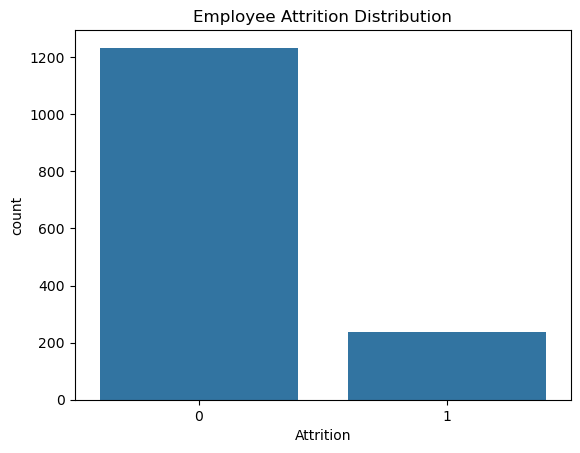

In [324]:
# Visualizations

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Attrition', data=df)
plt.title('Employee Attrition Distribution')
plt.show()


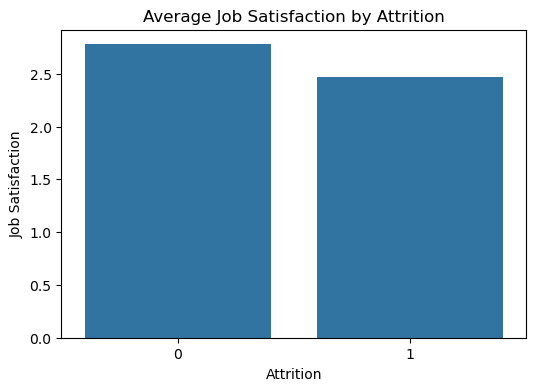

In [326]:
# Check if satisfaction is linked with attrition
plt.figure(figsize=(6, 4))
sns.barplot(x='Attrition', y='JobSatisfaction', data=df, errorbar=None)
plt.title('Average Job Satisfaction by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Job Satisfaction')
plt.show()


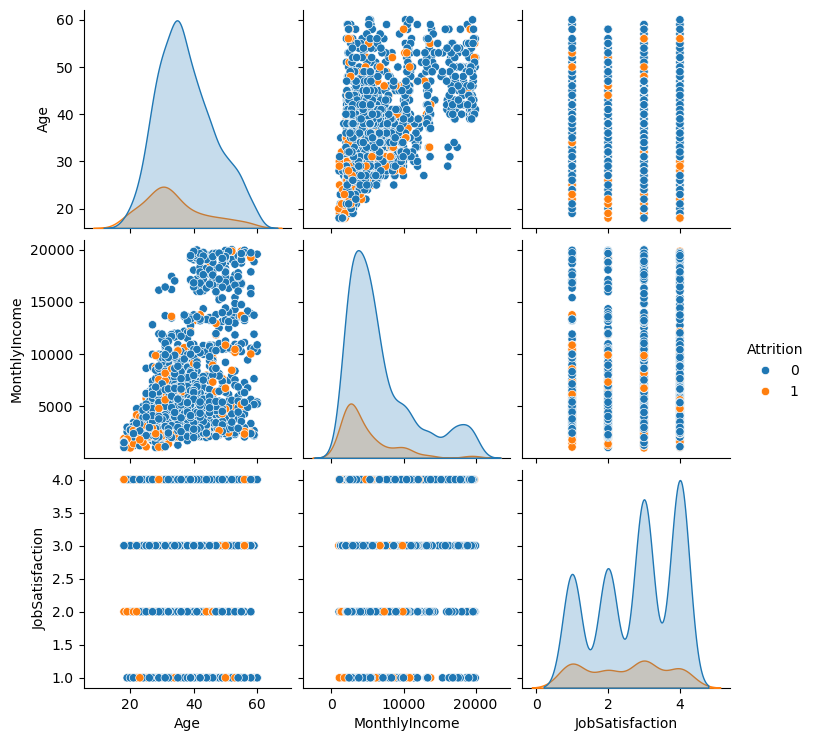

In [328]:
#Overview of multivariable relationships

sns.pairplot(df[['Attrition', 'Age', 'MonthlyIncome', 'JobSatisfaction']], hue='Attrition')
plt.show()


In [329]:
import pandas as pd

# Create a DataFrame of feature names and their corresponding coefficients
coeff_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_[0]
})

# Sort by absolute value of coefficient
coeff_df['Importance'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Importance', ascending=False)

# Display top features
print(coeff_df[['Feature', 'Coefficient']])


                              Feature  Coefficient
13                           OverTime     0.957079
26      JobRole_Laboratory Technician     0.768081
33   BusinessTravel_Travel_Frequently     0.697561
21                     YearsAtCompany     0.647105
22                 YearsInCurrentRole    -0.624170
43               MaritalStatus_Single     0.613631
32       JobRole_Sales Representative     0.501517
12                 NumCompaniesWorked     0.500273
23            YearsSinceLastPromotion     0.488018
18                  TotalWorkingYears    -0.454822
24               YearsWithCurrManager    -0.447775
34       BusinessTravel_Travel_Rarely     0.425653
9                     JobSatisfaction    -0.425039
4             EnvironmentSatisfaction    -0.404817
30         JobRole_Research Scientist     0.394850
31            JobRole_Sales Executive     0.379905
25            JobRole_Human Resources     0.372547
7                      JobInvolvement    -0.333906
2                    DistanceFr

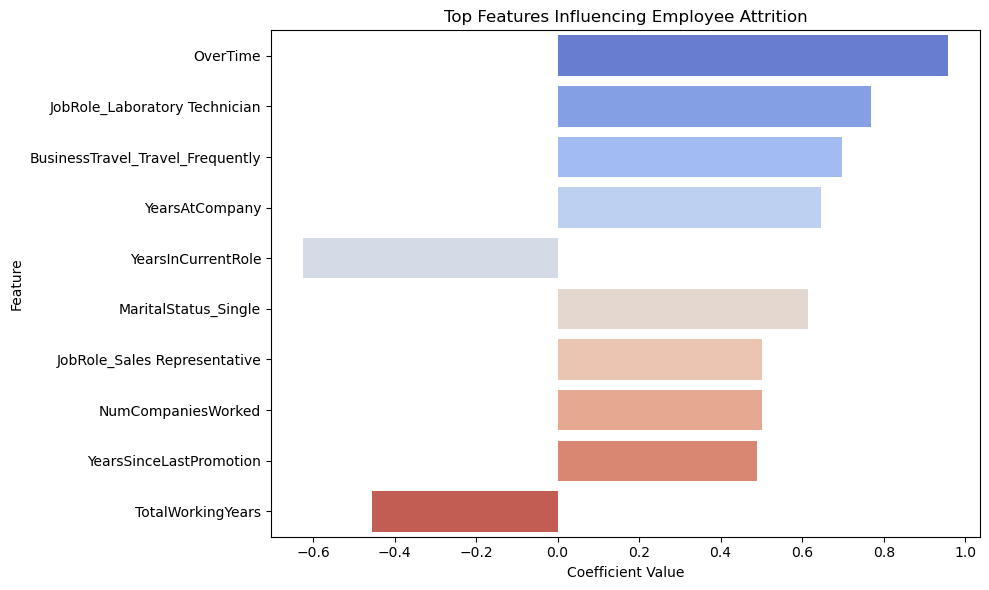

In [330]:
plt.figure(figsize=(10, 6))
sns.barplot(
    y='Feature',
    x='Coefficient',
    hue='Feature',  
    data=top_features,
    palette='coolwarm',
    dodge=False,
    legend=False
)
plt.title('Top Features Influencing Employee Attrition')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
